<a href="https://colab.research.google.com/github/jamesliao2016/HCDR2018/blob/master/simple_rnn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.6.0


In [ ]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
# dataset, info = tfds.load('imdb_reviews', with_info=True,
#                           as_supervised=True)
# train_dataset, test_dataset = dataset['train'], dataset['test']

# train_dataset.element_spec

In [ ]:
dataset

{'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}

In [ ]:
for example, label in train_dataset.take(5):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0
text:  b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. 

In [ ]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [ ]:
# 一个映射单词到整数索引的词典
word_index = imdb.get_word_index()

# 保留第一个索引
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [ ]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [ ]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [ ]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [ ]:
# 输入形状是用于电影评论的词汇数目（10,000 词）
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Time Series

In [ ]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size,1)
  time = np.linspace(0,1,n_steps)
  series = 0.5 * np.sin((time - offsets1)*(freq1*10+10))
  series += 0.2*np.sin((time - offsets2)*(freq2*20+20))
  series += 0.1*(np.random.rand(batch_size,n_steps)-0.5)
  return series[..., np.newaxis].astype(np.float32)

In [ ]:
# np.linspace(0,1,10)

In [ ]:
# np.random.rand(4, 1,1)

In [ ]:
# freq1, freq2, offsets1, offsets2 = np.random.rand(4, 2,1)

In [ ]:
# freq1

In [ ]:
# jj=np.linspace(0,1,10) 

In [ ]:
n_steps = 50
series = generate_time_series(10000,n_steps+1)
X_train, y_train = series[:7000, :n_steps], series[:7000,-1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000,-1]
X_test, y_test = series[9000:, :n_steps], series[9000:,-1]

In [ ]:
# X_train.shape
# X_train[0][0]
# X_train[0].shape
# X_train[0].dtype
# X_train[0]

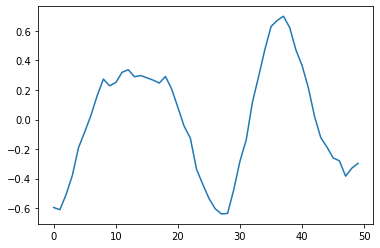

In [ ]:
import matplotlib.pyplot as plt

# data = np.random.randint(3, 7, (10, 1, 1, 80))
# newdata = np.squeeze(data) # Shape is now: (10, 80)
plt.plot(X_train[0]) # plotting by columns
plt.show()

In [ ]:
# baseline metrics

In [ ]:
## naive forecasting

In [ ]:
y_pred = X_valid[:,-1]

In [ ]:
# y_pred.shape

In [ ]:
# y_valid.shape

In [ ]:
# series.shape

In [ ]:
np.mean(keras.losses.mean_squared_error(y_valid,y_pred))

0.020641565

In [ ]:
## Fully connected network

In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[50,1]),
                                keras.layers.Dense(1)])

In [ ]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanSquaredError(),
              metrics=tf.keras.metrics.MeanSquaredError())

In [ ]:
history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_valid, y_valid))

Epoch 1/50
219/219 [==============================] - 16s 70ms/step - loss: 0.3501 - mean_squared_error: 0.3501 - val_loss: 0.2450 - val_mean_squared_error: 0.2450
Epoch 2/50
219/219 [==============================] - 15s 69ms/step - loss: 0.2253 - mean_squared_error: 0.2253 - val_loss: 0.2096 - val_mean_squared_error: 0.2096
Epoch 3/50
219/219 [==============================] - 15s 69ms/step - loss: 0.1873 - mean_squared_error: 0.1873 - val_loss: 0.1730 - val_mean_squared_error: 0.1730
Epoch 4/50
219/219 [==============================] - 15s 69ms/step - loss: 0.1552 - mean_squared_error: 0.1552 - val_loss: 0.1489 - val_mean_squared_error: 0.1489
Epoch 5/50
219/219 [==============================] - 15s 69ms/step - loss: 0.1419 - mean_squared_error: 0.1419 - val_loss: 0.1445 - val_mean_squared_error: 0.1445
Epoch 6/50
219/219 [==============================] - 15s 69ms/step - loss: 0.1398 - mean_squared_error: 0.1398 - val_loss: 0.1437 - val_mean_squared_error: 0.1437
Epoch 7/50
219/2

In [ ]:
# Implementing a simple RNN

In [ ]:
model = keras.models.Sequential([keras.layers.SimpleRNN(1,input_shape=[None,1])])

In [ ]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanSquaredError(),
              metrics=tf.keras.metrics.MeanSquaredError())

In [ ]:
history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_valid, y_valid))

Epoch 1/50
219/219 [==============================] - 16s 69ms/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 2/50
219/219 [==============================] - 15s 67ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 3/50
219/219 [==============================] - 15s 67ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 4/50
219/219 [==============================] - 15s 67ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 5/50
219/219 [==============================] - 15s 68ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 6/50
219/219 [==============================] - 15s 68ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 7/50
219/2

In [ ]:
# Deep RNNs

In [ ]:
model = keras.models.Sequential([keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
                                 keras.layers.SimpleRNN(20,return_sequences=True),
                                 keras.layers.SimpleRNN(1)])

In [ ]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.MeanSquaredError(),
              metrics=tf.keras.metrics.MeanSquaredError())

history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_valid, y_valid))

Epoch 1/50
219/219 [==============================] - 49s 212ms/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 2/50
219/219 [==============================] - 46s 211ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 3/50
219/219 [==============================] - 46s 212ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 4/50
219/219 [==============================] - 46s 209ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 5/50
219/219 [==============================] - 47s 213ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 6/50
219/219 [==============================] - 46s 211ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 7/50